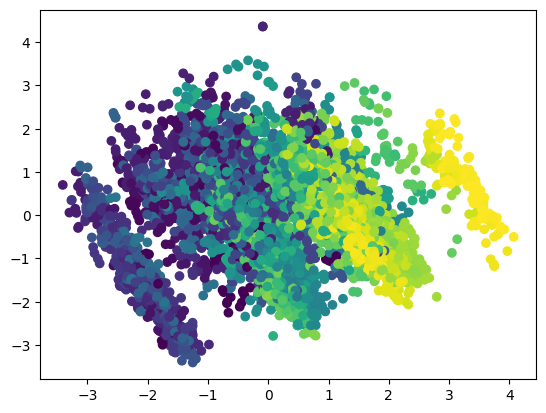

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from scipy.sparse.csgraph import connected_components
from sklearn.neighbors import KernelDensity
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd

df = pd.read_csv('dataset/temp/dataset_test.csv')


encoded = df.apply(LabelEncoder().fit_transform)
scaled = StandardScaler().fit_transform(encoded)

pca = PCA(n_components=2)
fe = pca.fit_transform(scaled)

X = np.array(fe)



# Define parameters for KNN and KDE
n_neighbors = 2
bandwidth = 1.0

# Perform KNN to identify core points
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(X)
dist, indices = knn.kneighbors(X)
A = kneighbors_graph(knn, n_neighbors=n_neighbors, mode='distance')
data = np.maximum(0, 1 - dist / bandwidth)
indptr = np.arange(len(X) + 1) * n_neighbors
indices = indices.ravel()
A = csr_matrix((data.ravel(), indices, indptr), shape=(len(X), len(X)))
n_components, labels = connected_components(csgraph=A, directed=False, return_labels=True)

# Perform KDE on all points
# kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
# kde.fit(X)
# log_dens = kde.score_samples(X)

# Find cluster label for each point based on the maximal kernel density value
# max_log_dens = np.max(log_dens)
# cluster_labels = np.empty(len(X), dtype=int)
# for i in range(n_components):
#     mask = labels == i
#     cluster_kde = kde.score_samples(X[mask])
#     cluster_labels[mask] = i if np.max(cluster_kde) == max_log_dens else -1

# Plot the clusters
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [36]:
n_components

2204